# Introduction

* The World Happiness Report is a landmark survey of the state of global happiness. 
* Published reports: 2015, 2016, 2017, 2018 and 2019
* The report contains <b> 155 countries by their happiness levels, economics, psychology, survey analysis, national statistics, health, public policy and more </b>
*  The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness. 

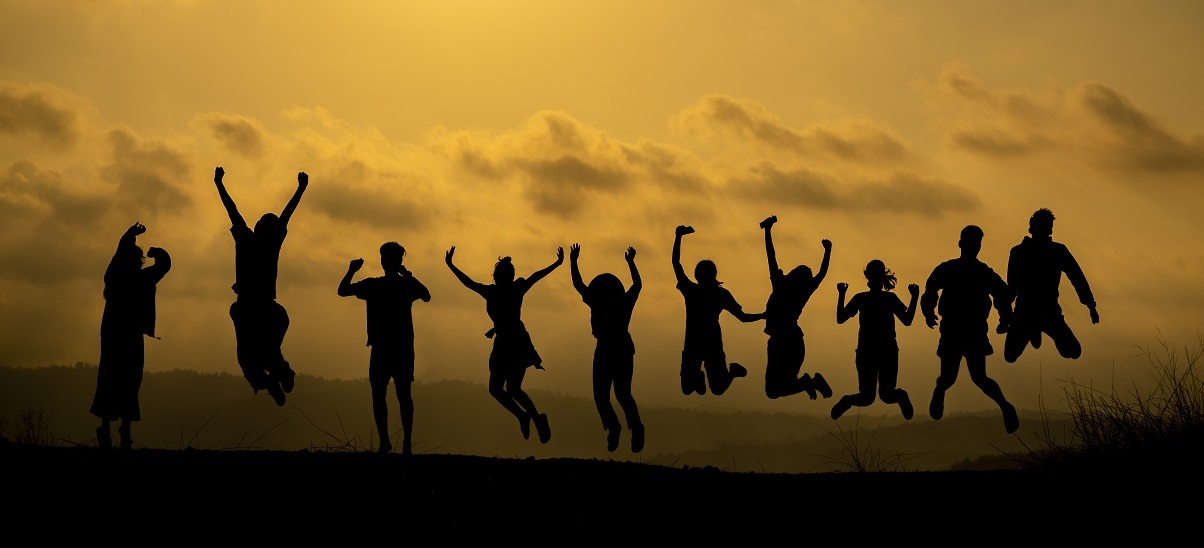


# Content

1. [Load and check data](#1)
2. [Variable description](#2)
3. [Visualization](#3)
    * [Bar Plot](#4)
    * [Point Plot](#5)
    * [Joint Plot](#6)
    * [Pie Chart](#7)
    * [Lm Plot](#8)
    * [Kde Plot](#9)
    * [Violin Plot](#10)
    * [Heatmap](#11)
    * [Box Plot](#12)
    * [Swarm Plot](#13)
    * [Pair Plot](#14)
    * [Count Plot](#15)
4. [Conclusion](#16)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


<a id="1"></a><br>
# Load and Check Data

# 2019

In [ ]:
wh_2015 = pd.read_csv("/kaggle/input/world-happiness/2015.csv")
wh_2016 = pd.read_csv("/kaggle/input/world-happiness/2016.csv")
wh_2017 = pd.read_csv("/kaggle/input/world-happiness/2017.csv")
wh_2018 = pd.read_csv("/kaggle/input/world-happiness/2018.csv")
wh_2019 = pd.read_csv("/kaggle/input/world-happiness/2019.csv")

In [ ]:
wh_2019.head()

In [ ]:
wh_2019.tail()

In [ ]:
wh_2019.columns

In [ ]:
wh_2019.describe().T

<a id="2"></a><br>
# Variable Description

Columns:

1. <b>Overall rank</b>
2. <b>Country or region</b>
3. <b>Score</b>
4. <b>GDP per capita</b> : Shows a country's GDP divided by its total population
5. <b>Social support</b>
6. <b>Healthy life expectancy</b>
7. <b>Freedom to make life choices</b>
8. <b>Generosity</b>
9. <b>Perceptions of corruption</b>

In [ ]:
wh_2019.info()

* <b> float64 (7) </b>: Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption
* <b> int64  (1) </b>: Overall rank
* <b> object/string  (1) </b>: Country or region

### NaN (Null) Values
Looking for NaN values:

In [ ]:
wh_2019[wh_2019.isna().any(axis=1)]

There is no NaN values, so we can skip this part.

<a id="3"></a><br>
# Visualization

<a id="4"></a><br>
### Bar Plot 

Let's look at first 25 countries scores by descending order.

In [ ]:
# definition of values
country_list = list(wh_2019["Country or region"].head(25))
country_score = list(wh_2019["Score"].head(25))

# sorting
data = pd.DataFrame({"country_list": country_list, "country_score": country_score})
new_index = (data["country_score"].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(15, 7))
sns.barplot(x = sorted_data["country_list"], y = sorted_data["country_score"])
plt.xticks(rotation=90)
plt.xlabel("Countries")
plt.ylabel("Scores")
plt.title("Countries and Scores")
plt.show()

We have different variables about survey of the state of global happiness which can comparison. 

In [ ]:
# definition of values
country_list = list(wh_2019["Country or region"].head(25))
country_score = list(wh_2019["Score"].head(25))
country_GDP = list(wh_2019["GDP per capita"].head(25))
country_social_support = list(wh_2019["Social support"].head(25))
country_healthy_life = list(wh_2019["Healthy life expectancy"].head(25))
country_freedom = list(wh_2019["Freedom to make life choices"].head(25))
country_generosity = list(wh_2019["Generosity"].head(25))
country_corruption = list(wh_2019["Perceptions of corruption"].head(25))

# visualization
f, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x=country_score, y=country_list, color="red", alpha=0.5, label="Score")
sns.barplot(x=country_GDP, y=country_list, color="black", alpha=1, label="GDP per capita")
sns.barplot(x=country_social_support, y=country_list, color="blue", alpha=0.7, label="Social Support")
sns.barplot(x=country_healthy_life, y=country_list, color="purple", alpha=0.9, label="Healthy life expectancy")
sns.barplot(x=country_freedom, y=country_list, color="yellow", alpha=1, label="Freedom to make life choices")
sns.barplot(x=country_generosity, y=country_list, color="pink", alpha=1, label="Generosity")
sns.barplot(x=country_corruption, y=country_list, color="cyan", alpha=0.3, label="Perceptions of corruption")

ax.legend(loc="lower right", frameon=True)
ax.set(xlabel="Survey of the state", ylabel="Countries", title="Comparison of countries according to variables")
plt.show()

<a id="5"></a> <br>
### Point Plot

<b>Question:</b> Is healthy life expectancy increase as social support increase?

In [ ]:
# normalize 
data = pd.DataFrame({"country_list": country_list, "country_social_support": country_social_support})

new_index = (data["country_social_support"].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)
sorted_data["country_social_support"] = sorted_data["country_social_support"] / max(sorted_data["country_social_support"])

data = pd.DataFrame({"country_list": country_list, "country_healthy_life": country_healthy_life})

new_index = (data["country_healthy_life"].sort_values(ascending=False)).index.values
sorted_data2 = data.reindex(new_index)
sorted_data2["country_healthy_life"] = sorted_data2["country_healthy_life"] / max(sorted_data2["country_healthy_life"])

data = pd.concat([sorted_data, sorted_data2["country_healthy_life"]], axis=1)
data.sort_values("country_social_support", inplace=True)

# visualization
f = plt.subplots(figsize=(42,10))
sns.pointplot(x="country_list", y="country_social_support", data=data,color="magenta", alpha=0.8)
sns.pointplot(x="country_list", y="country_healthy_life", data=data ,color="red", alpha=0.8)
plt.xlabel("Countries", fontsize=22, color="red")
plt.ylabel("Values", fontsize=22, color="red")
plt.text(19, 0.93, "Healthy life expectancy", color="red", fontsize=22)
plt.text(19, 0.91, "Social support", color="magenta", fontsize=22)
plt.title("Healthy life expectancy vs Social Support", fontsize=22)
plt.grid()
plt.show()

<a id="6"></a> <br>
### Joint Plot

<b>Question:</b> Is country freedom increase as country score increase?

In [ ]:
# definition of values
country_list = list(wh_2019["Country or region"])
country_score = list(wh_2019["Score"])
country_GDP = list(wh_2019["GDP per capita"])
country_social_support = list(wh_2019["Social support"])
country_healthy_life = list(wh_2019["Healthy life expectancy"])
country_freedom = list(wh_2019["Freedom to make life choices"])
country_generosity = list(wh_2019["Generosity"])
country_corruption = list(wh_2019["Perceptions of corruption"])

In [ ]:
data = pd.DataFrame({"country_score": country_score, "country_freedom": country_freedom})

g = sns.jointplot(data.country_score, data.country_freedom, kind="kde", height=8)
plt.savefig("graph.png")
plt.show()

<b>Question:</b> Is perceptions of corruption decreases as genoristy increases?

In [ ]:
data = pd.DataFrame({"country_corruption": country_corruption, "country_generosity": country_generosity})

g = sns.jointplot("country_generosity", "country_corruption", data=data, height=8, ratio=4, kind="reg")

Actually, I didn't expect this response. Our answer is: <b>No.</b> If country's generosity increases, than country's perception of corruption increases too.

# 2016

<a id="7"></a><br>
### Pie Chart

Until this time we investigated world happiness report 2019. We can investigate another reports, ex: 2016.

In [ ]:
wh_2016.head()

In World Happiness Report 2016 have small differences in terms of column names.
The fact that the <b>country names</b> and <b>country regions</b> are in different columns makes our job easier.

In [ ]:
wh_2016.Region.unique()

Here is Regions:

    * Western Europe
    * North America
    * Australia and New Zealand
    * Middle East and Northern Africa
    * Latin America and Caribbean
    * Southeastern Asia
    * Central and Eastern Europe
    * Eastern Asia
    * Sub-Saharan Africa
    * Southern Asia

In [ ]:
# nan values check
wh_2016[wh_2016.isna().any(axis=1)]

In [ ]:
# definitions
country_region = wh_2016["Region"]
country_happiness = wh_2016["Happiness Score"]
country_lower_confidence = wh_2016["Lower Confidence Interval"]
country_upper_confidence = wh_2016["Upper Confidence Interval"]
country_economy = wh_2016["Economy (GDP per Capita)"]
country_family = wh_2016["Family"]
country_health = wh_2016["Health (Life Expectancy)"]
country_freedom = wh_2016["Freedom"]
country_trust = wh_2016["Trust (Government Corruption)"]
country_generosity = wh_2016["Generosity"]
country_dystopia = wh_2016["Dystopia Residual"]

In [ ]:
# definitions
labels = wh_2016.Region.value_counts().index
colors = ["gray", "green", "blue", "magenta", "cyan", "yellow", "purple", "brown", "red", "orange"]
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
sizes = wh_2016.Region.value_counts().values

# visualization
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Country Numbers according to Regions", color="blue", fontsize=15)
plt.show()

<a id="8"></a><br>
### Lm Plot

<b>Question:</b> Is economy of country increase as happiness of country increase?

In [ ]:
data = pd.DataFrame({"country_economy": country_economy, "country_happiness": country_happiness})

sns.lmplot(x="country_economy", y="country_happiness", data = data, height=8)
plt.show()

<a id="9"></a><br>
### Kde Plot

<b> Question: </b> What kind of relationship has a country between freedom and lower confidence interval?

In [ ]:
data = pd.DataFrame({"country_lower_confidence": country_lower_confidence, "country_freedom": country_freedom})

sns.kdeplot(data.country_lower_confidence, data.country_freedom, shade=True, cut=5)
plt.show()

<a id="10"></a><br>
### Violin Plot

<b> Question: </b> What kind of relationship has a country between economy and health (life expectancy)?

In [ ]:
data = pd.DataFrame({"country_economy": country_economy, "country_health": country_health})
palette = sns.light_palette((210, 90, 60), input="husl")

sns.violinplot(data=data, palette=palette, inner="points")
plt.show()

<a id="11"></a><br>
### Heatmap

We can visualize correlation between datas using heatmaps.

In [ ]:
data = pd.DataFrame({"country_economy": country_economy, "country_health": country_health, "country_lower_confidence": country_lower_confidence,
                    "country_upper_confidence": country_upper_confidence})
data.corr()

In [ ]:
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax, cmap="BuPu")
plt.show()

<a id="12"></a><br>
### Box Plot

<b> Question: </b> What is the the health by region?

In [ ]:
data = pd.DataFrame({"country_region": country_region, "country_health": country_health})

plt.figure(figsize=(30, 7))
sns.boxplot(x="country_region", y="country_health", data=data,palette="BuPu")
plt.show()

<a id="13"></a><br>
### Swarm Plot

<b> Question: </b> What is the population by region?

In [ ]:
data = pd.DataFrame({"country_region": country_region, "country_family": country_family})

plt.figure(figsize=(30, 7))
sns.swarmplot(x="country_region", y="country_family", data=data)
plt.xlabel("Region", fontsize=20, color="purple")
plt.ylabel("Family", fontsize=20, color="purple")
plt.show()

<a id="14"></a><br>
### Pair Plot

With pair plot, we can see relationship in a dataset.

In [ ]:
cols = wh_2016.loc[:, "Happiness Score":"Family"] # Happiness Score, Lower/Upper Confidence, Economy and Family

sns.pairplot(cols)
plt.show()

### Count Plot

<b> Question: </b> What is the number of regions used in the data set?

In [ ]:
plt.figure(figsize = (30, 7))
sns.countplot(wh_2016.Region)
plt.show()

In [ ]:
# grouping as a region and calculating sum
wh_2016.groupby("Region").sum()

In [ ]:
# grouping as a region and calculcating economy column
economy = wh_2016.groupby("Region")[["Economy (GDP per Capita)"]].sum()
economy

<a id="16"></a><br>
# Conclusion

<b> If you have any questions or comments, I really want to hear it. Thanks for view my data visualization. </b>